In [1]:
# バージョン指定
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# sys.pathの設定
import sys
sys.path.append('/content/drive/My Drive/DNN_code')

keras     
線形回帰

In [5]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

iters_num = 1000
plot_interval = 10

# -1 から　１　までの等差数列を生成
x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

print(x)
print(d)


[-0.39698492  0.53768844 -0.47738693  0.42713568 -0.36683417  0.37688442
  0.50753769 -0.35678392 -0.78894472  0.05527638  0.00502513  0.64824121
 -0.07537688 -0.94974874  0.09547739  0.2361809  -0.70854271 -0.95979899
  0.10552764  0.82914573 -0.33668342 -0.6281407  -0.08542714 -0.2160804
 -0.5879397   0.85929648 -0.09547739  0.44723618 -0.79899497 -0.49748744
  0.93969849  0.72864322  0.45728643 -0.48743719 -0.74874372 -0.77889447
 -0.11557789 -0.02512563  0.88944724  0.86934673  0.26633166 -0.1959799
  0.90954774 -0.66834171 -0.93969849 -0.01507538  0.68844221  0.43718593
 -0.76884422 -0.85929648  0.40703518 -0.31658291  0.52763819 -0.38693467
  0.77889447 -0.16582915  0.03517588 -0.63819095  0.70854271  0.20603015
  0.75879397 -0.83919598 -0.71859296  0.9798995   0.65829146 -0.90954774
 -0.51758794  0.66834171  0.78894472  0.46733668 -1.          0.29648241
 -0.69849246  0.24623116  0.63819095 -0.55778894  0.15577889 -0.64824121
  0.38693467  0.18592965 -0.5678392   0.83919598 -0.2

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
# https://note.nkmk.me/python-tensorflow-keras-basics/
model = Sequential()
# 全結合層。units : 出力層の次元、input_dim : 入力層の次元
model.add(Dense(input_dim=1, units=1))

# モデルを表示
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')

# 学習
for i in range(iters_num):
  loss = model.train_on_batch(x, d)
  if (i+1) % plot_interval == 0:
    print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W: ', W)
print('b: ', b)

Generation: 10. 誤差 = 2.598834
Generation: 20. 誤差 = 1.8892202
Generation: 30. 誤差 = 1.3960725
Generation: 40. 誤差 = 1.0498916
Generation: 50. 誤差 = 0.80396944
Generation: 60. 誤差 = 0.6268529
Generation: 70. 誤差 = 0.49730667
Generation: 80. 誤差 = 0.40094712
Generation: 90. 誤差 = 0.32799122
Generation: 100. 誤差 = 0.27175015
Generation: 110. 誤差 = 0.2276204
Generation: 120. 誤差 = 0.19240826
Generation: 130. 誤差 = 0.16387658
Generation: 140. 誤差 = 0.14043966
Generation: 150. 誤差 = 0.1209589
Generation: 160. 誤差 = 0.10460392
Generation: 170. 誤差 = 0.09075905
Generation: 180. 誤差 = 0.078959815
Generation: 190. 誤差 = 0.068849385
Generation: 200. 誤差 = 0.06014867
Generation: 210. 誤差 = 0.052635685
Generation: 220. 誤差 = 0.04613106
Generation: 230. 誤差 = 0.040487815
Generation: 240. 誤差 = 0.03558403
Generation: 250. 誤差 = 0.031317554
Generation: 260. 誤差 = 0.02760201
Generation: 270. 誤差 = 0.024363887
Generation: 280. 誤差 = 0.021540256
Generation: 290. 誤差 = 0.019076994
Generation: 300. 誤差 = 0.016927391
Generation: 310. 誤

単純パーセプトロン

In [11]:
from keras.layers import Activation
from keras.optimizers import SGD

# 乱数を固定値で初期化
np.random.seed(0)

# シグモイドでの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

# 入力X, 正解データT
X = np.array([[0,0], [0,1], [1,0], [1,1]])
T = np.array([[0], [1], [1], [1]])

# 訓練
model.fit(X, T, epochs=30, batch_size=1)

# 訓練データの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print('test')
print(Y==T)

Epoch 1/30
4/4 [==============================] - 0s 21ms/step - loss: 0.4352
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 0.4204
Epoch 3/30
4/4 [==============================] - 0s 2ms/step - loss: 0.4079
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3971
Epoch 5/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3876
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 0.3790
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3717
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 0.3650
Epoch 9/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3586
Epoch 10/30
4/4 [==============================] - 0s 5ms/step - loss: 0.3528
Epoch 11/30
4/4 [==============================] - 0s 4ms/step - loss: 0.3476
Epoch 12/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3425
Epoch 13/30
4/4 [==============================] - 0s 3ms/step - loss: 0

分類(iris)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                60        
_________________________________________________________________
activation_6 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_7 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 2ms/step - loss: 1.1501 - accuracy: 0.5250 - val_loss: 0.9159 - val_accuracy: 0.6000
Epoch 2/20
120/120 [==============================] - 0s 281us/step -

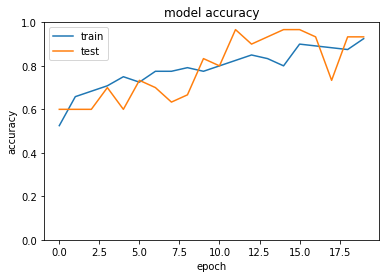

In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
d = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

# モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

# 正答率
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


分類(mnist)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 1

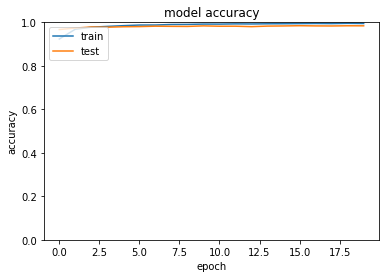

In [29]:
from data.mnist import load_mnist

(x_train, d_train) , (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

from keras.layers import Dropout
from keras.optimizers import Adam

# モデルの設定
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

# 正答率
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


CNN分類(mnist)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)             

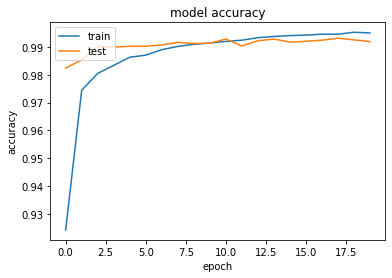

In [30]:
# データセットのロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# 行列として入力するため加工
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# 分類数
num_classes = 10

from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D

# モデルの構築
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

# 正解率
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

cifar10     
10種のラベル分類     
学習データ50000, テストデータ10000

In [32]:
# CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()

# CIFAR-10の正規化
from keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルのone-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# モデルの構築 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# モデルのコンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
# 訓練
history = model.fit(x_train, d_train, epochs=20)
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価, 評価結果出力
print(model.evaluate(x_test, d_test))

Epoch 1/20
50000/50000 [==============================] - 241s 5ms/step - loss: 1.5261 - accuracy: 0.4459
Epoch 2/20
50000/50000 [==============================] - 234s 5ms/step - loss: 1.1487 - accuracy: 0.5916
Epoch 3/20
50000/50000 [==============================] - 233s 5ms/step - loss: 0.9927 - accuracy: 0.6491
Epoch 4/20
50000/50000 [==============================] - 234s 5ms/step - loss: 0.9024 - accuracy: 0.6818
Epoch 5/20
50000/50000 [==============================] - 233s 5ms/step - loss: 0.8402 - accuracy: 0.7045
Epoch 6/20
50000/50000 [==============================] - 233s 5ms/step - loss: 0.7881 - accuracy: 0.7222
Epoch 7/20
50000/50000 [==============================] - 233s 5ms/step - loss: 0.7506 - accuracy: 0.7379
Epoch 8/20
50000/50000 [==============================] - 234s 5ms/step - loss: 0.7128 - accuracy: 0.7497
Epoch 9/20
50000/50000 [==============================] - 235s 5ms/step - loss: 0.6816 - accuracy: 0.7587
Epoch 10/20
50000/50000 [=====================

RNN    
2進数足し算の予測

In [34]:
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]

# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int]  # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int]  # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]


# モデルの構築
model = Sequential()
model.add(SimpleRNN(units=16,
                    return_sequences=True,
                    input_shape=[8, 2],
                    go_backwards=False,
                    activation='relu'))

# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1, 2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1, 8, 1), verbose=0)
print('test loss', score[0])
print('test accuracy', score[1])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_32 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 18s 2ms/step - loss: 0.1285 - accuracy: 0.8337
Epoch 2/5
10000/10000 [==============================] - 13s 1ms/step - loss: 0.0190 - accuracy: 0.9920
Epoch 3/5
10000/10000 [==============================] - 13s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 4/5
10000/10000 [==============================] - 13s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/5
10000/10000 [==============================] - 13s 1ms/step - loss: 6.8504e-04 - accuracy: 